In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.api import qqplot
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc("font",family = "NanumBarunGothic")
# 음수 표시
matplotlib.rc("axes",unicode_minus=False)

# 1. decribe -> 0 이하 값 확인
# 2. isna
# 3. box plot
# 4. histogram
# 5. 산점도

In [2]:
# 데이터 불러오기
df_oxi = pd.read_csv("/home/piai/바탕화면/B3_반도체/01 Oxidation.csv",encoding='euc-kr', index_col = 0)
df_soft = pd.read_csv("/home/piai/바탕화면/B3_반도체/02 Photo_softbake.csv",encoding='euc-kr', index_col = 0)
df_litho = pd.read_csv("/home/piai/바탕화면/B3_반도체/03 Photo_lithograpy.csv",encoding='euc-kr', index_col = 0)
df_etch = pd.read_csv("/home/piai/바탕화면/B3_반도체/04 Etching.csv",encoding='euc-kr', index_col = 0)
df_ion = pd.read_csv("/home/piai/바탕화면/B3_반도체/05 Ion_Implantation.csv",encoding='euc-kr', index_col = 0)
df_ins = pd.read_csv("/home/piai/바탕화면/B3_반도체/06 Inspect.csv",encoding='euc-kr', index_col = 0)

df_name = [df_oxi, df_soft, df_litho, df_etch, df_ion, df_ins]

In [3]:
for d in df_name:
    print(d.shape)

(1704, 13)
(1704, 18)
(1704, 10)
(1704, 13)
(1704, 15)
(1718, 7)


In [4]:
df = pd.merge(df_oxi, df_soft, on = ['No_Die', 'Lot_Num','Wafer_Num', 'Datetime'], how = 'inner')
df = pd.merge(df, df_litho, on = ['No_Die', 'Lot_Num','Wafer_Num', 'Datetime'], how = 'inner')
df = pd.merge(df, df_etch, on =  ['No_Die', 'Lot_Num','Wafer_Num', 'Datetime'], how = 'inner')
df = pd.merge(df, df_ion, on =  ['No_Die', 'Lot_Num','Wafer_Num', 'Datetime'], how = 'inner')
df = pd.merge(df, df_ins, on =  ['No_Die', 'Lot_Num','Wafer_Num', 'Datetime'], how = 'inner')

In [5]:
pd.set_option('display.max_columns', None) 
df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2022,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,1,photo_li,41.676,I,365,505.388,109.628,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,1,Implantation,1.500000e+16,1.320000e+17,6.470000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2022,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,1,photo_li,53.612,H,405,541.732,104.917,2,Etching,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,2,Implantation,1.110000e+16,4.370000e+16,1.040000e+18,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2022,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,1,photo_li,47.598,I,365,532.200,106.632,3,Etching,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,3,Implantation,1.040000e+16,1.510000e+16,6.470000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2022,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,1,photo_li,32.843,G,436,537.729,108.785,1,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,1,Implantation,8.885140e+15,1.020000e+17,3.410000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2022,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,1,photo_li,57.370,H,405,522.143,109.913,2,Etching,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,2,Implantation,1.670000e+16,7.880000e+16,7.260000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79.0,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2022,3,Photo,0.89644,16.029,15.005,19.998,204.429,90.000,504.429,4088.587,5110.734,5.114,93.622,29.996,3,photo_li,32.525,I,365,468.930,106.744,3,Etching,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,3,Implantation,1.050000e+16,9.510000e+16,6.270000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...
1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2022,1,Photo,1.02384,17.587,14.949,20.000,204.266,90.000,504.266,4085.330,5106.662,5.083,93.227,29.994,1,photo_li,28.001,I,365,469.586,106.174,3,Etching,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,3,Implantation,6.909170e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 

In [6]:
df[['Ox_Chamber', 'photo_soft_Chamber','lithography_Chamber','Etching_Chamber','Chamber_Num' ]]

,Ox_Chamber,photo_soft_Chamber,lithography_Chamber,Etching_Chamber,Chamber_Num
0,2,1,1,1,1
1,2,1,1,2,2
2,2,1,1,3,3
3,2,1,1,1,1
4,2,1,1,2,2
...,...,...,...,...,...
1699,3,3,3,3,3
1700,1,1,1,3,3
1701,1,1,2,2,2
1702,1,1,3,1,1


In [7]:
x = ['Ox_Chamber', 'photo_soft_Chamber', 'lithography_Chamber', 'Etching_Chamber', 'Chamber_Num']
df["path"] = df[x].apply(lambda row: ''.join(map(str, row)), axis=1)

df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,path
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2022,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,1,photo_li,41.676,I,365,505.388,109.628,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,1,Implantation,1.500000e+16,1.320000e+17,6.470000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2022,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,1,photo_li,53.612,H,405,541.732,104.917,2,Etching,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,2,Implantation,1.110000e+16,4.370000e+16,1.040000e+18,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21122
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2022,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,1,photo_li,47.598,I,365,532.200,106.632,3,Etching,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,3,Implantation,1.040000e+16,1.510000e+16,6.470000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21133
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2022,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,1,photo_li,32.843,G,436,537.729,108.785,1,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,1,Implantation,8.885140e+15,1.020000e+17,3.410000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2022,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,1,photo_li,57.370,H,405,522.143,109.913,2,Etching,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,2,Implantation,1.670000e+16,7.880000e+16,7.260000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79.0,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,21122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2022,3,Photo,0.89644,16.029,15.005,19.998,204.429,90.000,504.429,4088.587,5110.734,5.114,93.622,29.996,3,photo_li,32.525,I,365,468.930,106.744,3,Etching,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,3,Implantation,1.050000e+16,9.510000e+16,6.270000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,33333
1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2022,1,Photo,1.02384,17.587,14.949,20.000,204.266,90.000,504.266,4085.330,5106.662,5.083,93.227,29.994,1,photo_li,28.001,I,365,469.586,106.174,3,Etching,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,3,Implantation,6.909170e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42.0,none,[

In [8]:
df["Defect"] = df["Target"].apply(lambda x: 1 if x >= 196 else 0)

df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,path,Defect
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2022,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,1,photo_li,41.676,I,365,505.388,109.628,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,1,Implantation,1.500000e+16,1.320000e+17,6.470000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111,0
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2022,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,1,photo_li,53.612,H,405,541.732,104.917,2,Etching,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,2,Implantation,1.110000e+16,4.370000e+16,1.040000e+18,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21122,0
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2022,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,1,photo_li,47.598,I,365,532.200,106.632,3,Etching,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,3,Implantation,1.040000e+16,1.510000e+16,6.470000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21133,0
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2022,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,1,photo_li,32.843,G,436,537.729,108.785,1,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,1,Implantation,8.885140e+15,1.020000e+17,3.410000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111,0
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2022,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,1,photo_li,57.370,H,405,522.143,109.913,2,Etching,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,2,Implantation,1.670000e+16,7.880000e+16,7.260000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79.0,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,21122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2022,3,Photo,0.89644,16.029,15.005,19.998,204.429,90.000,504.429,4088.587,5110.734,5.114,93.622,29.996,3,photo_li,32.525,I,365,468.930,106.744,3,Etching,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,3,Implantation,1.050000e+16,9.510000e+16,6.270000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,33333,0
1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2022,1,Photo,1.02384,17.587,14.949,20.000,204.266,90.000,504.266,4085.330,5106.662,5.083,93.227,29.994,1,photo_li,28.001,I,365,469.586,106.174,3,Etching,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,3,Implantation,6.909170e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.06

In [16]:
df['Defect'].value_counts()

0    1583
1     121
Name: Defect, dtype: int64

In [18]:
df.to_csv('반도체_생산실적_현황.csv',index=False)

In [9]:
for d in df_name:
    print('==============================')
    for c in d.select_dtypes(include = ['int64', 'float64']).columns:
        print(c)
        print(d[d[c] <= 0].count()[c])

Ox_Chamber
0
Temp_OXid
0
ppm
0
Pressure
0
Oxid_time
9
thickness
0
Lot_Num
0
Wafer_Num
0
photo_soft_Chamber
0
resist_target
0
N2_HMDS
0
pressure_HMDS
0
temp_HMDS
0
temp_HMDS_bake
0
time_HMDS_bake
0
spin1
0
spin2
0
spin3
0
photoresist_bake
0
temp_softbake
0
time_softbake
0
Lot_Num
0
Wafer_Num
0
lithography_Chamber
0
Line_CD
0
Wavelength
0
Resolution
0
Energy_Exposure
0
Lot_Num
0
Wafer_Num
0
Etching_Chamber
0
Thin F4
6
Thin F3
0
Thin F2
0
Thin F1
0
Temp_Etching
0
Source_Power
0
Selectivity
0
Lot_Num
0
Wafer_Num
0
Chamber_Num
0
Flux60s
0
Flux90s
16
Flux160s
8
Flux480s
0
Flux840s
0
input_Energy
0
Temp_implantation
0
Furance_Temp
0
RTA_Temp
0
Lot_Num
0
Wafer_Num
0
Lot_Num
0
Wafer_Num
0
Target
2


In [10]:
for d in df_name:
    print(d.isna().sum())

No_Die        0
Ox_Chamber    0
process       0
type          0
Temp_OXid     0
Vapor         0
ppm           0
Pressure      0
Oxid_time     0
thickness     0
Lot_Num       0
Wafer_Num     0
Datetime      0
dtype: int64
No_Die                0
photo_soft_Chamber    0
process 2             0
resist_target         0
N2_HMDS               0
pressure_HMDS         0
temp_HMDS             0
temp_HMDS_bake        0
time_HMDS_bake        0
spin1                 0
spin2                 0
spin3                 0
photoresist_bake      0
temp_softbake         0
time_softbake         0
Lot_Num               0
Wafer_Num             0
Datetime              0
dtype: int64
lithography_Chamber    0
Process 2-1            0
Line_CD                2
UV_type                0
Wavelength             0
Resolution             2
Energy_Exposure        2
Lot_Num                0
Wafer_Num              0
Datetime               0
dtype: int64
No_Die             0
Etching_Chamber    0
Process 3          0
Thin F4 

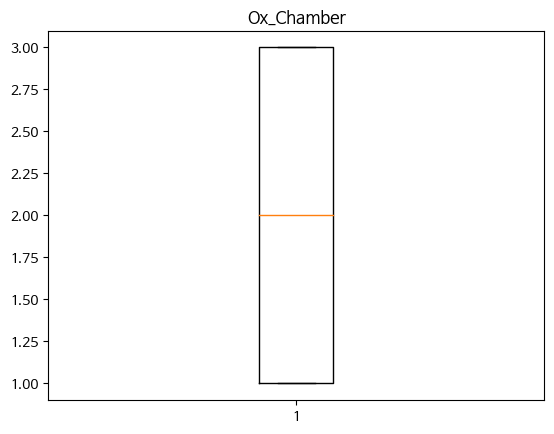

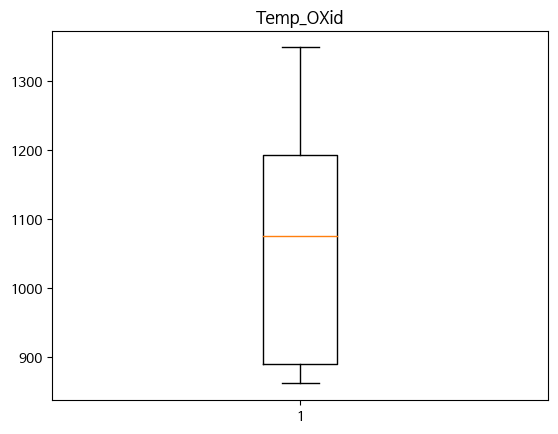

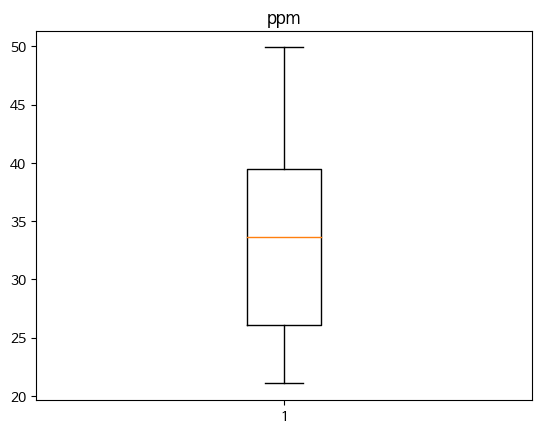

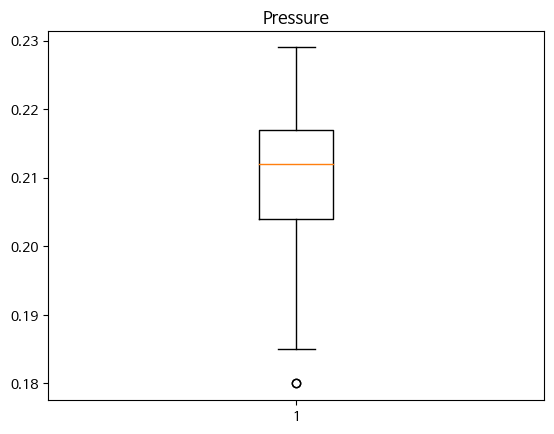

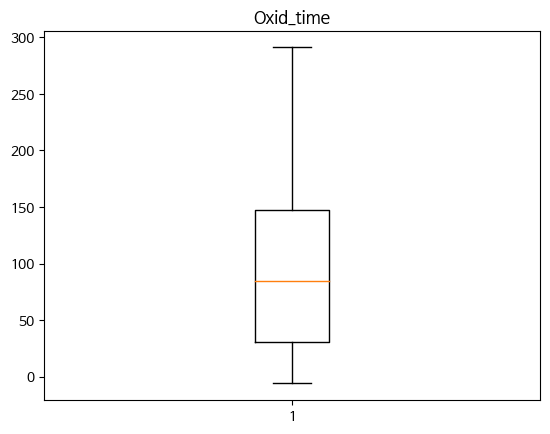

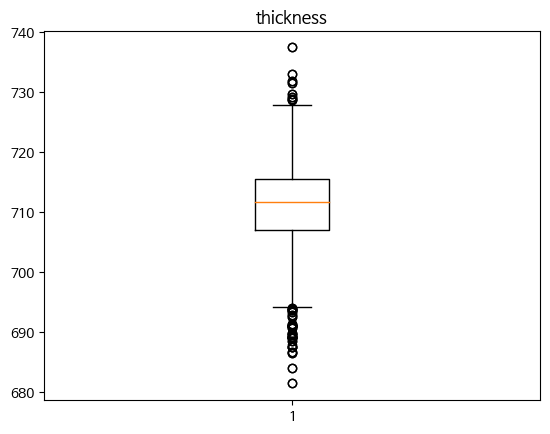

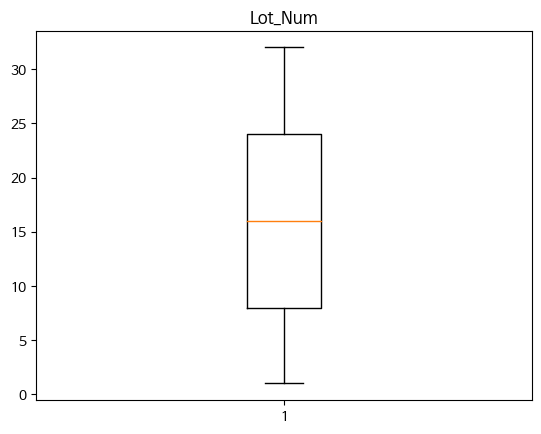

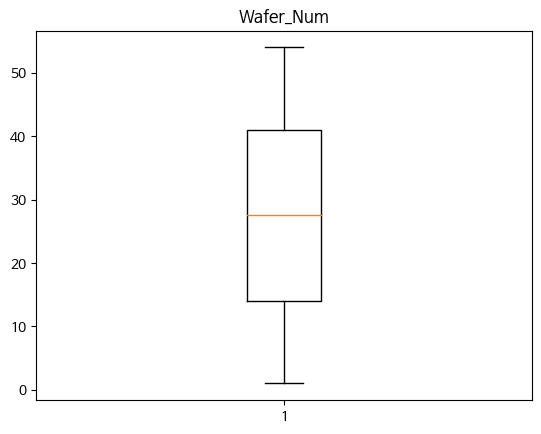

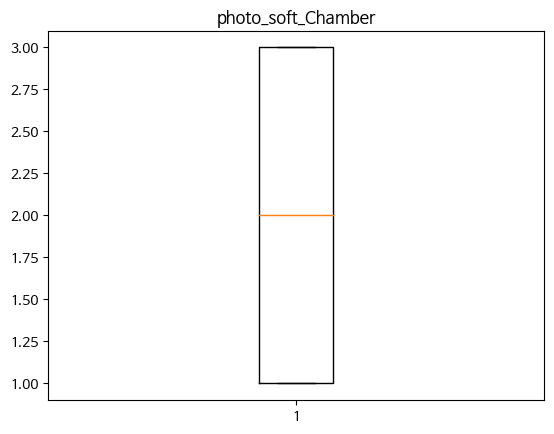

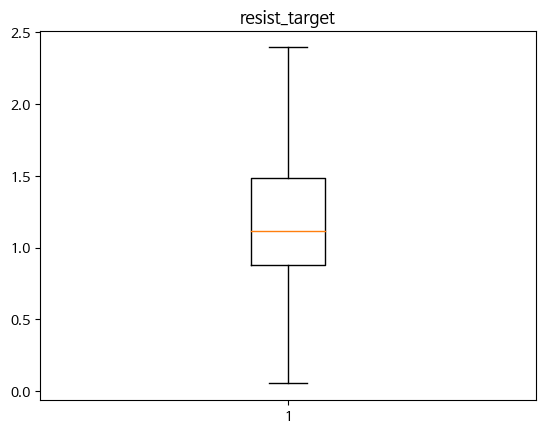

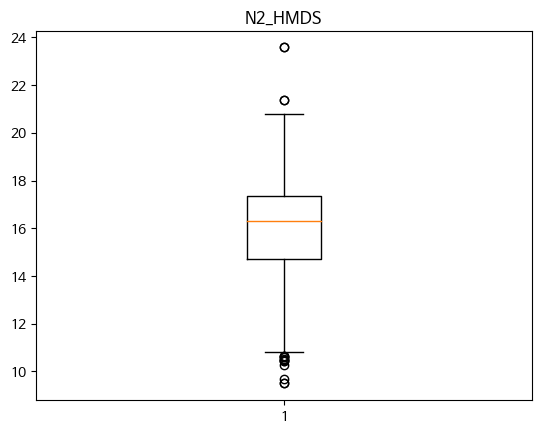

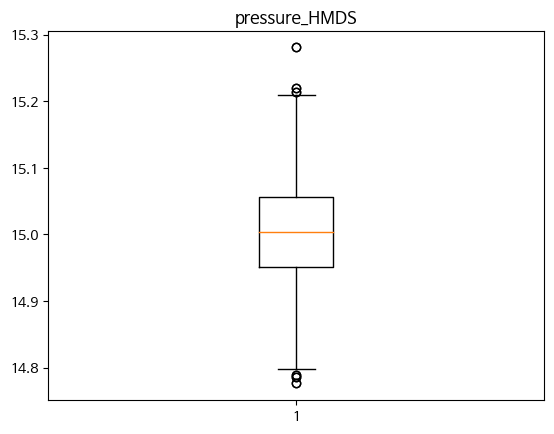

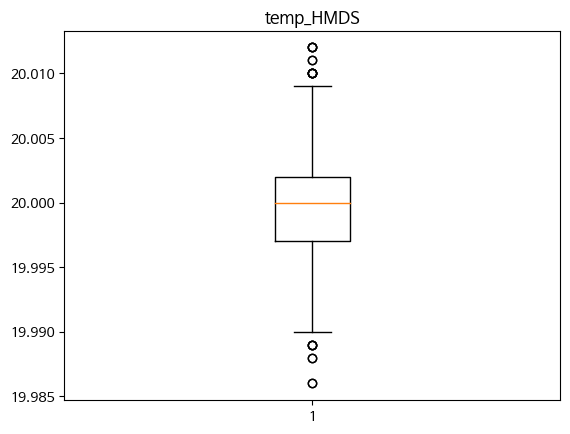

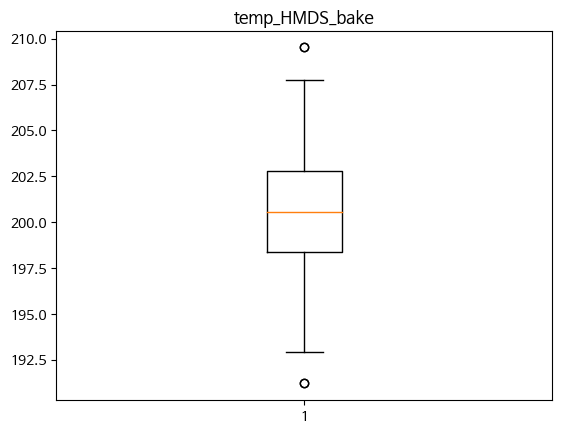

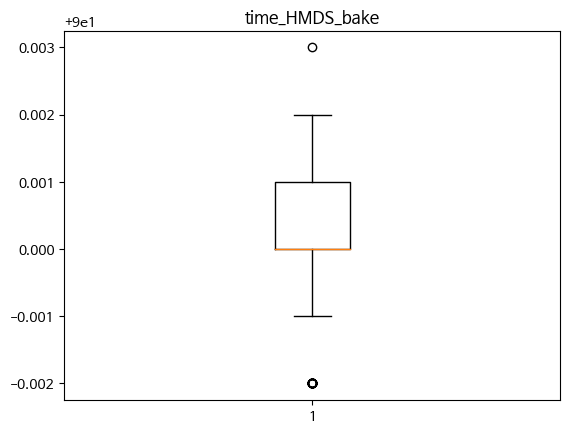

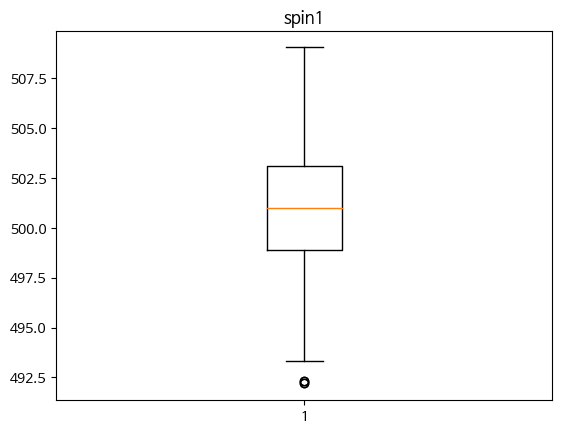

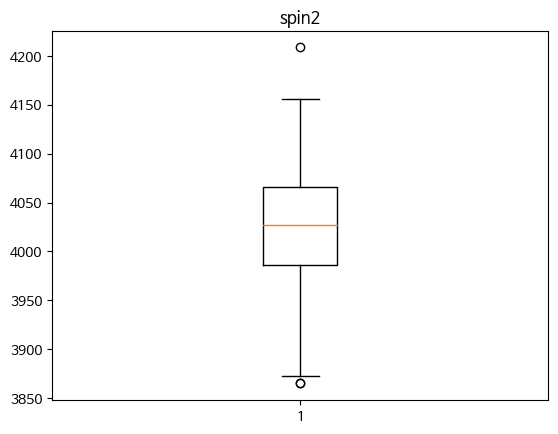

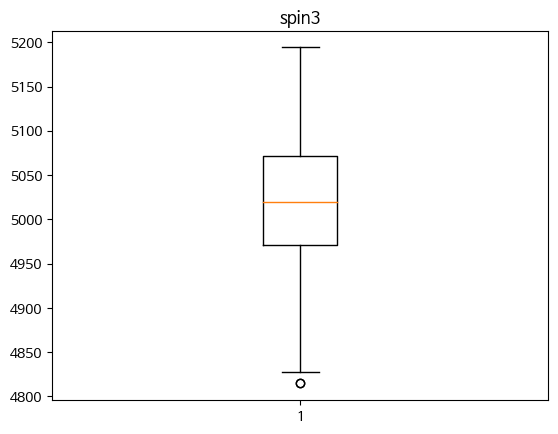

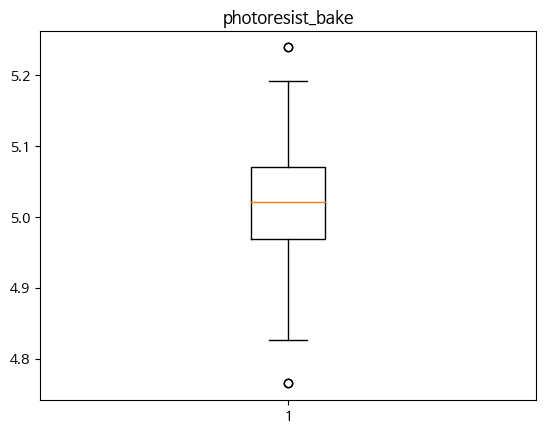

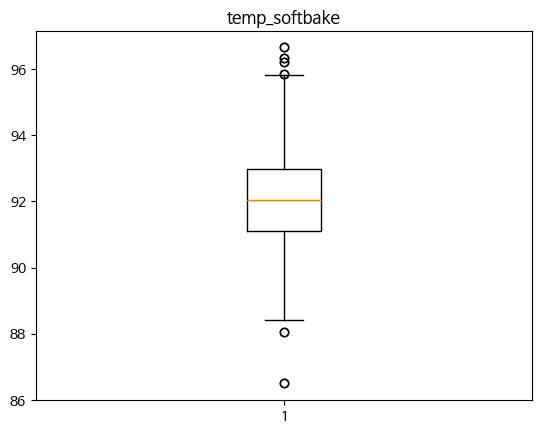

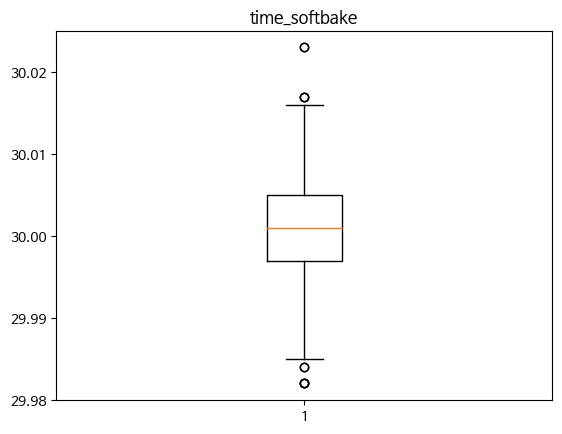

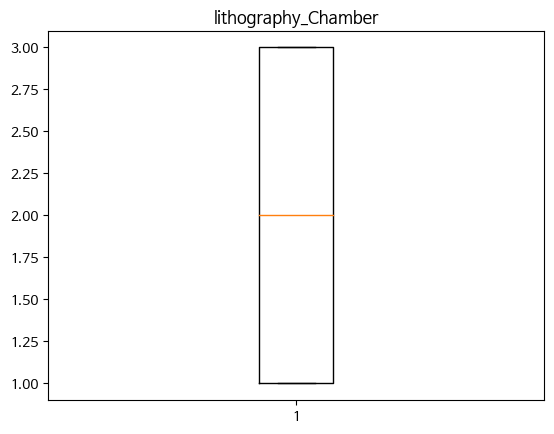

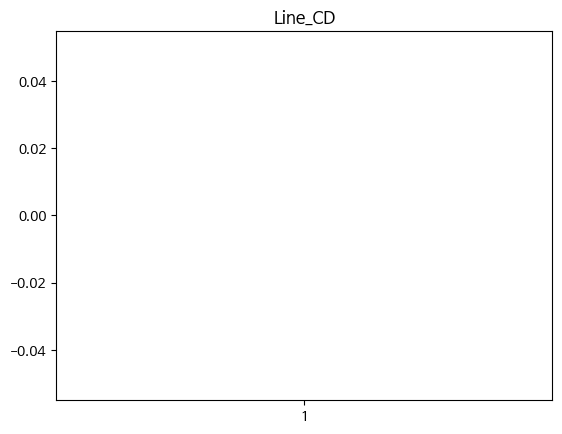

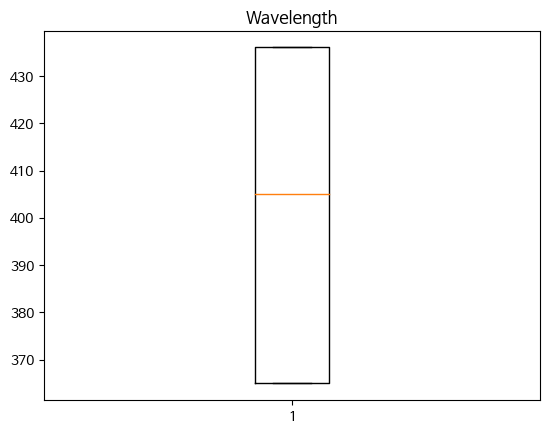

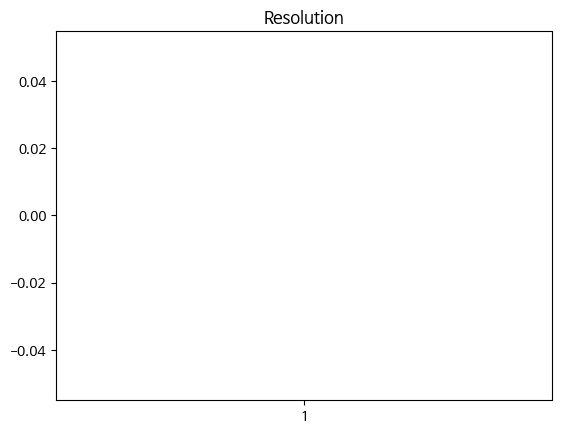

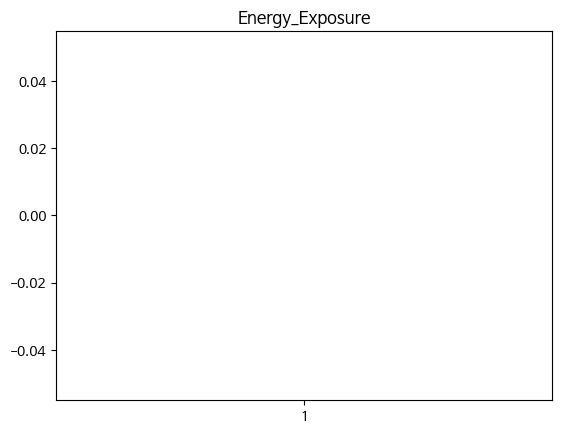

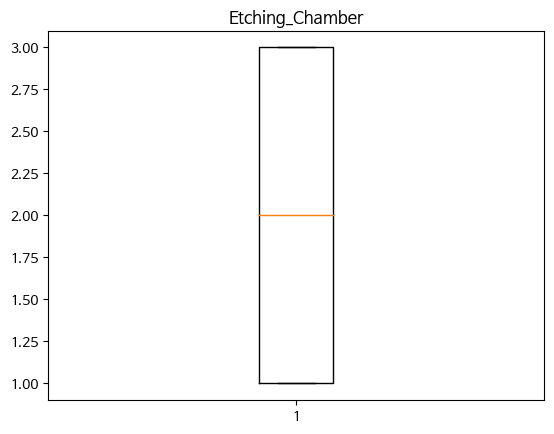

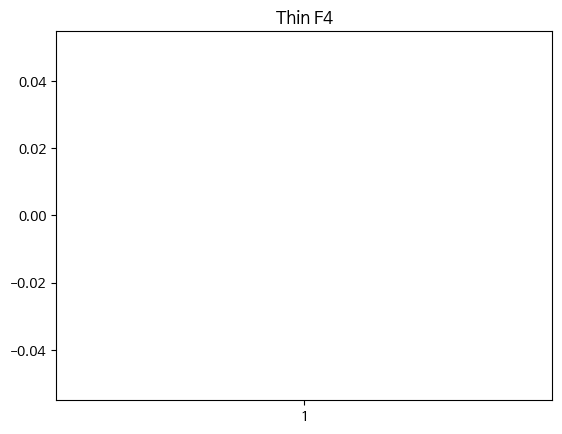

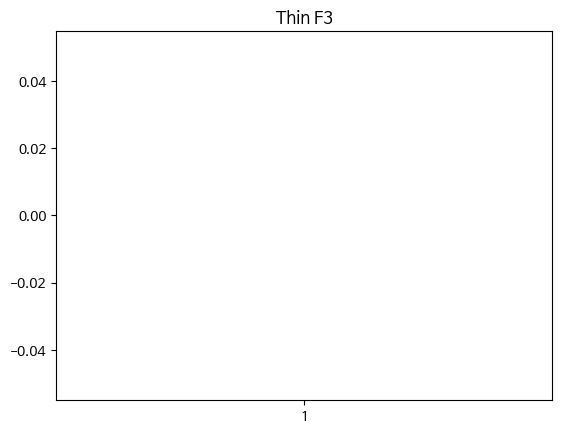

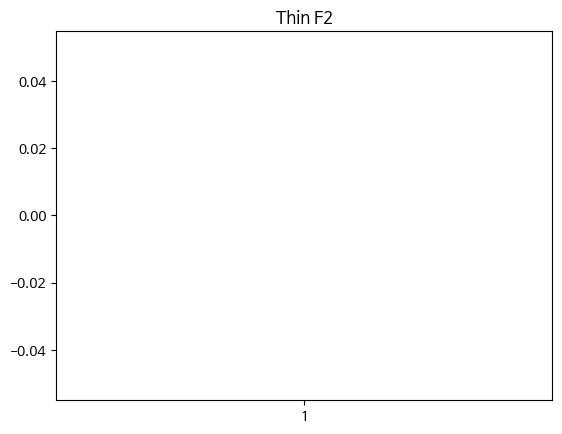

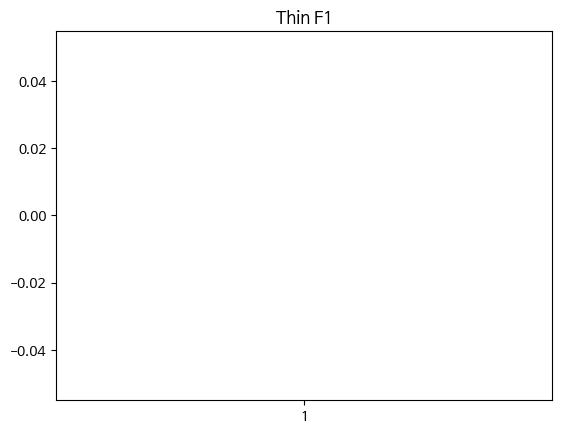

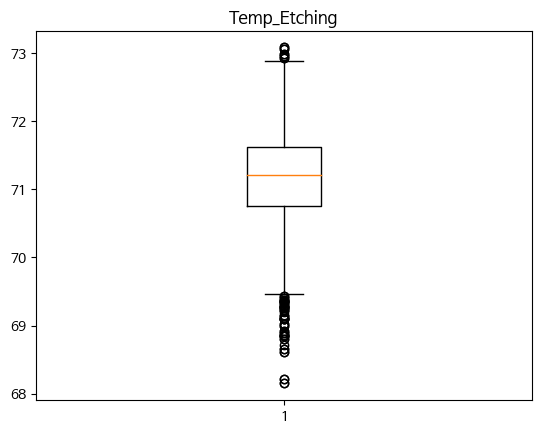

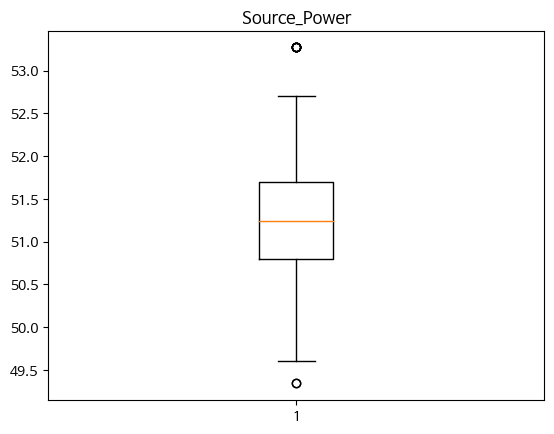

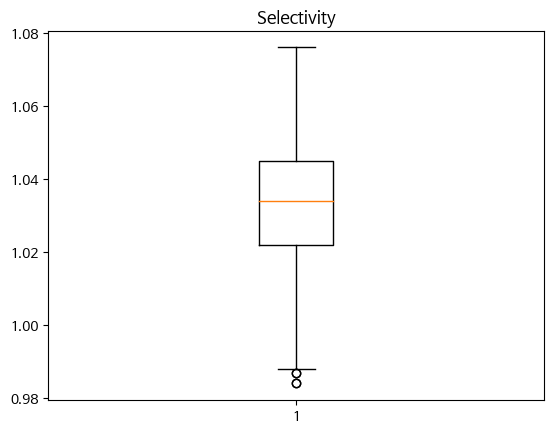

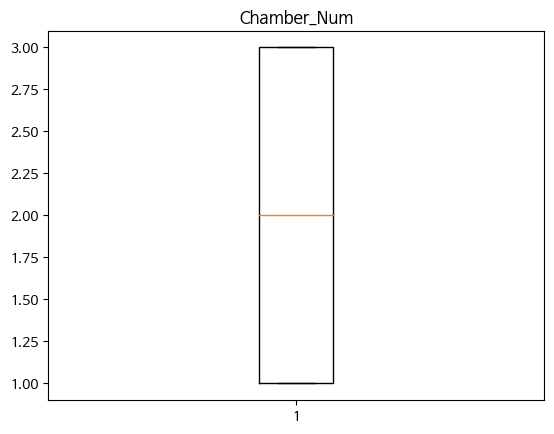

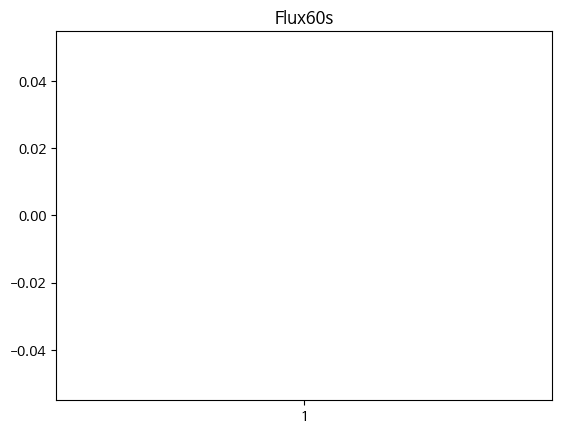

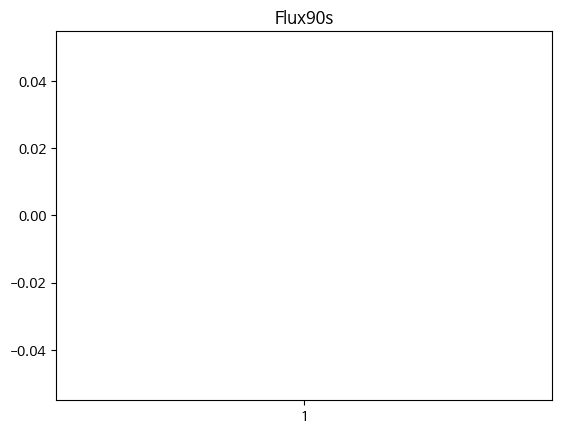

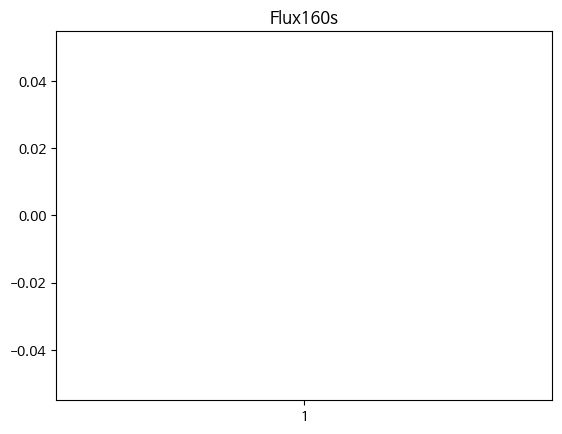

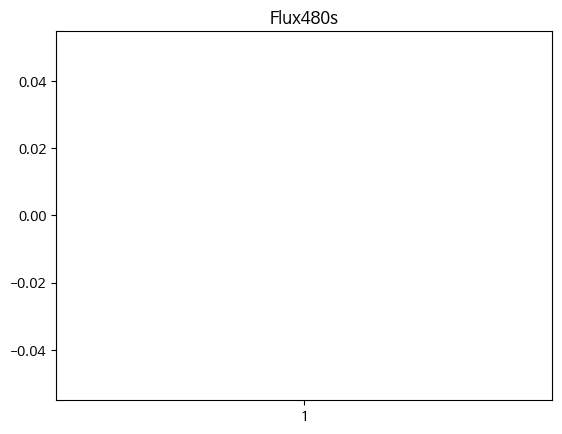

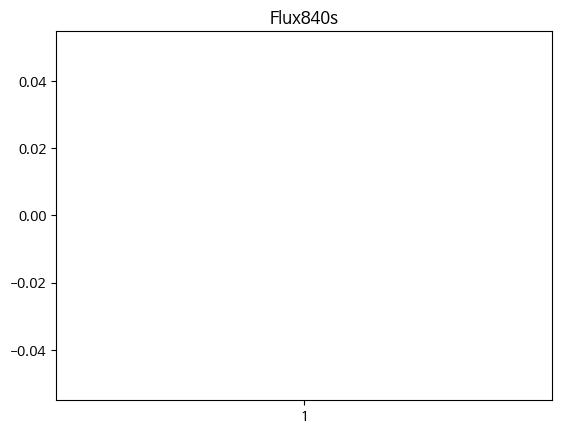

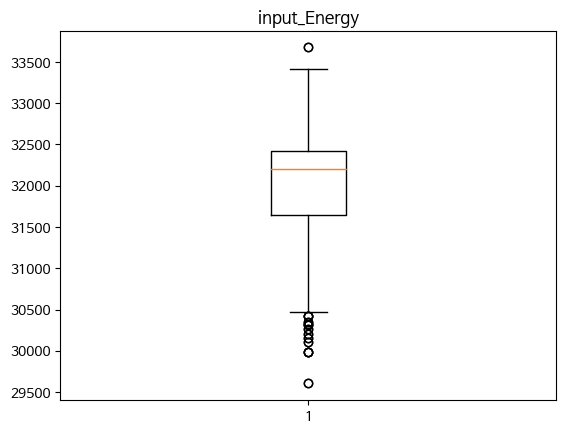

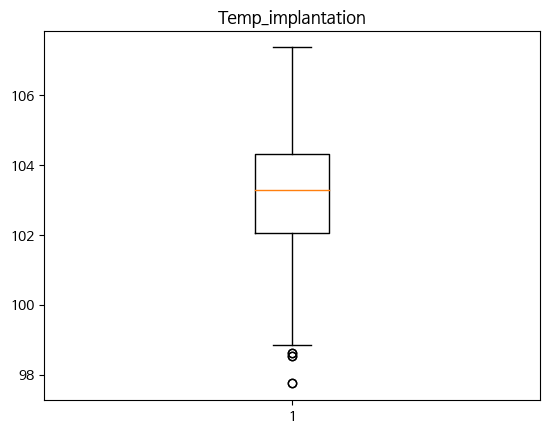

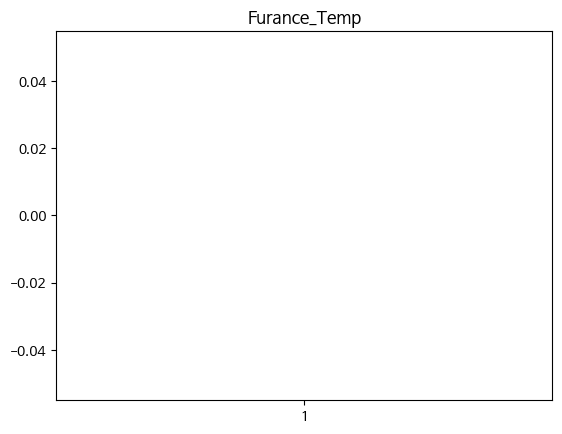

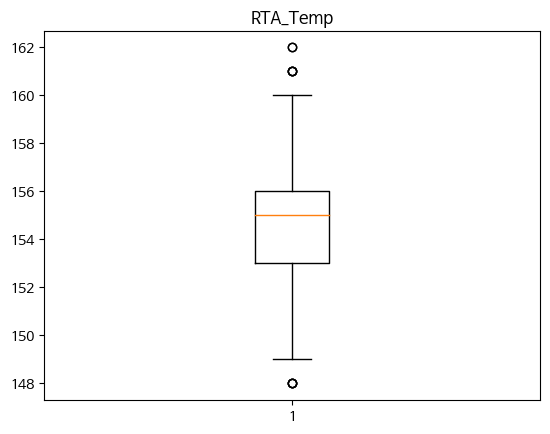

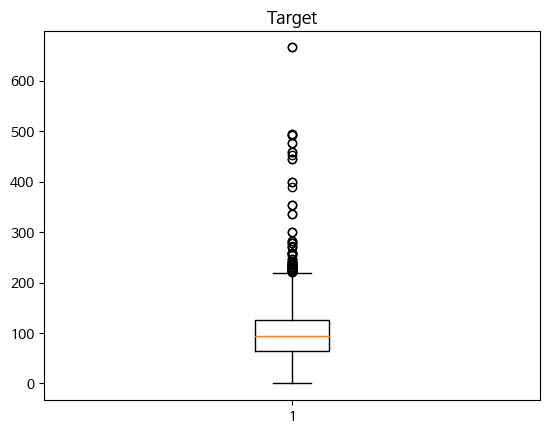

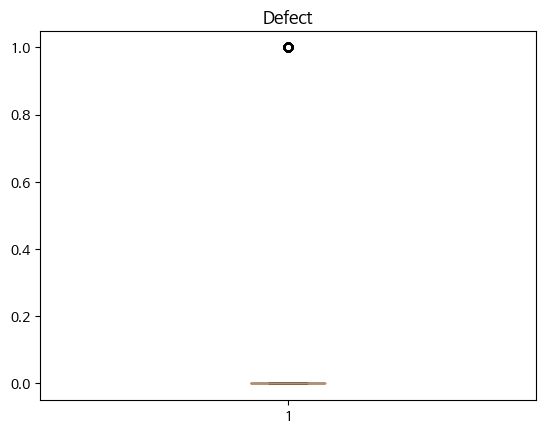

In [11]:
#데이터 속성 확인하기
columns = df.select_dtypes(include=['float64', 'int64']).columns
for c in columns:
    plt.boxplot(df[c])
    plt.title(c)
    plt.show()

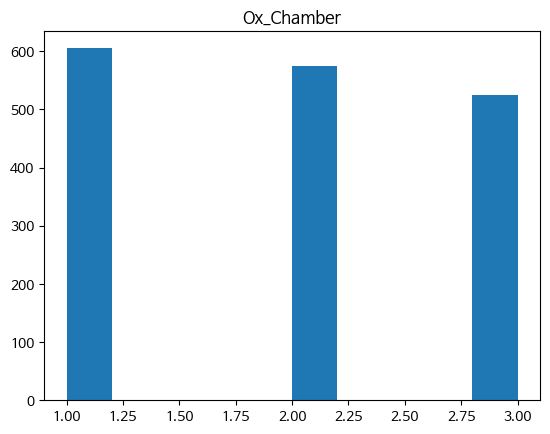

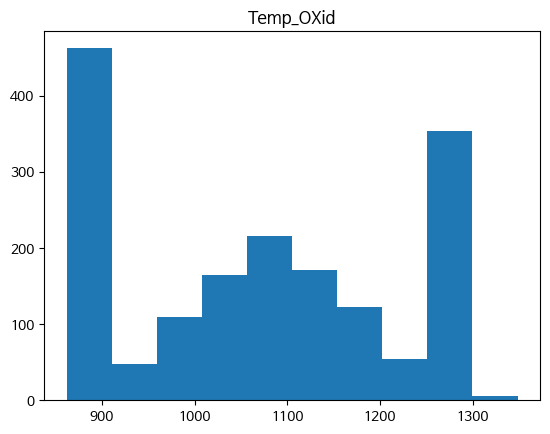

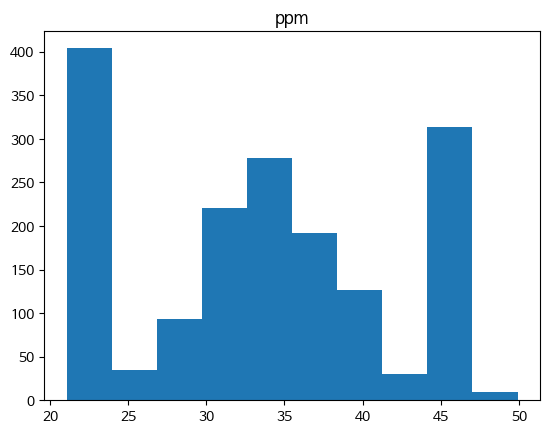

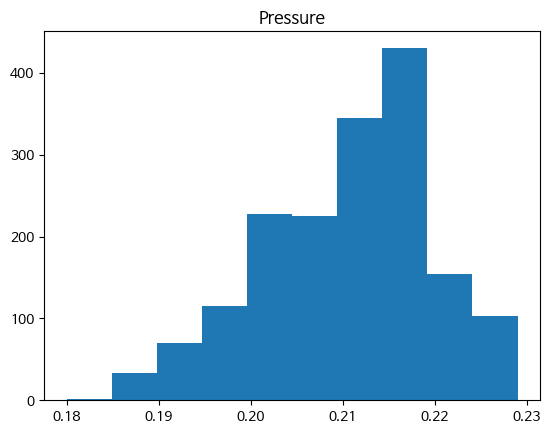

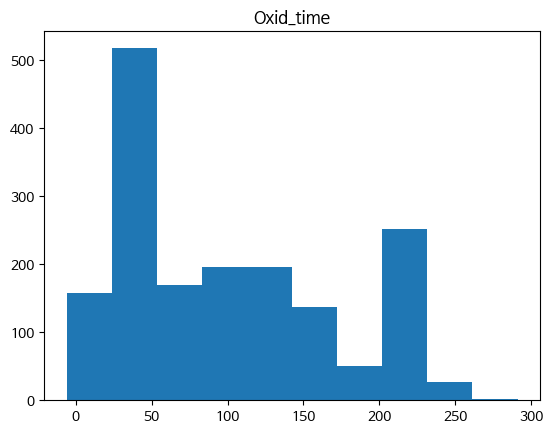

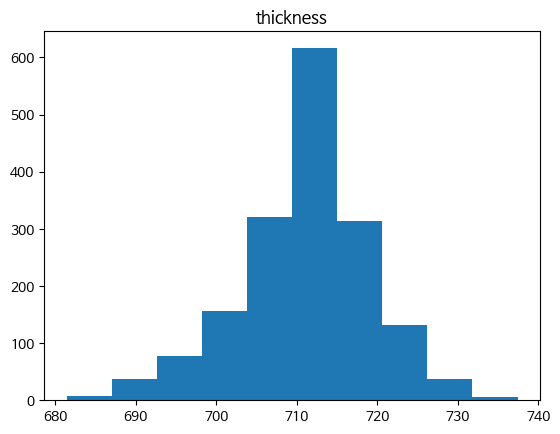

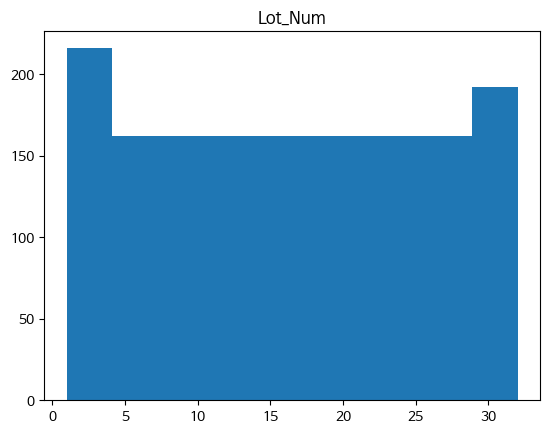

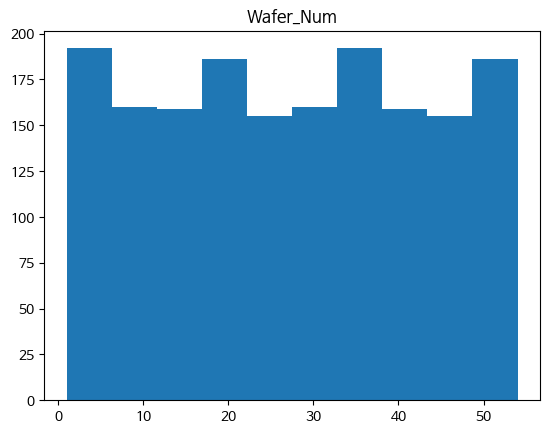

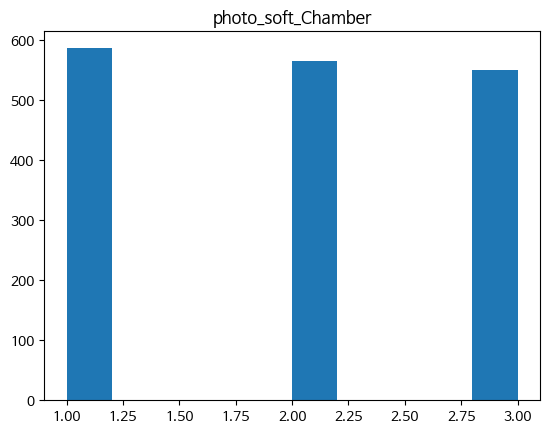

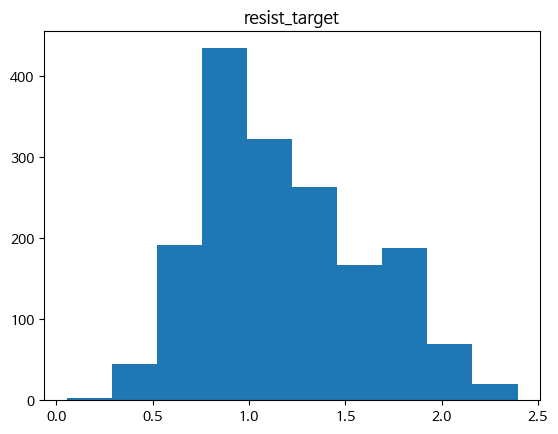

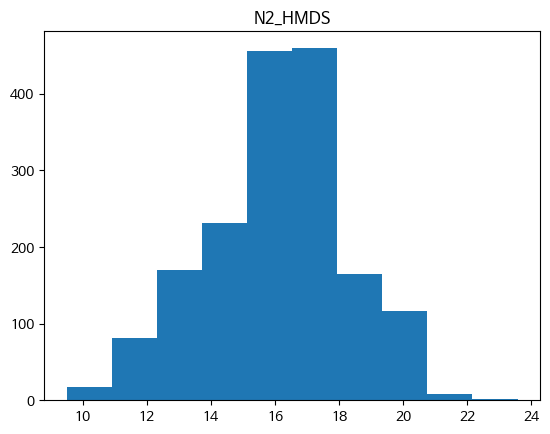

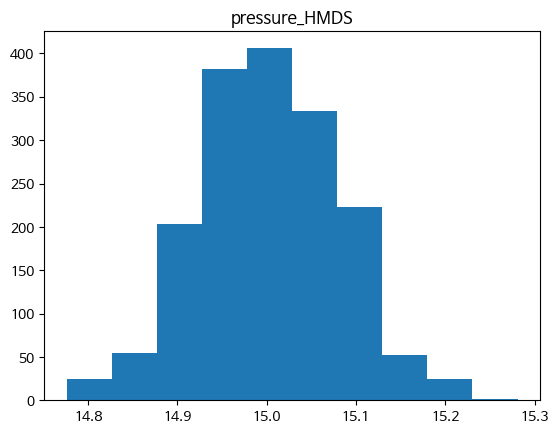

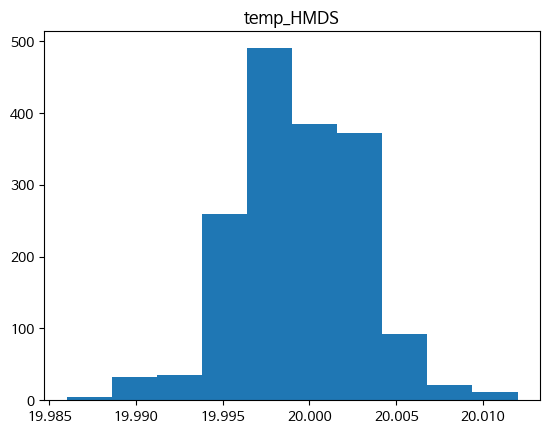

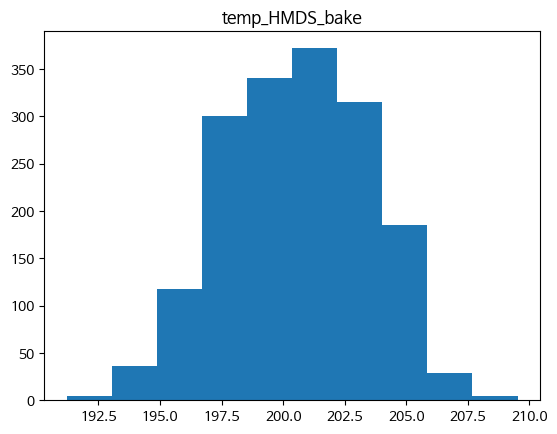

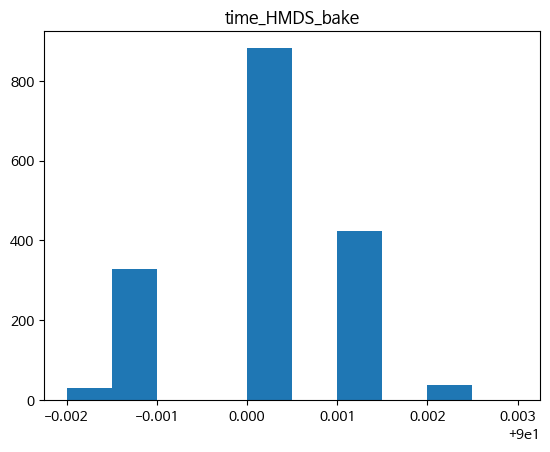

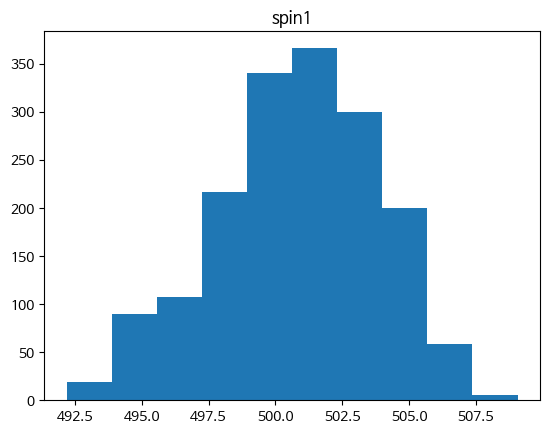

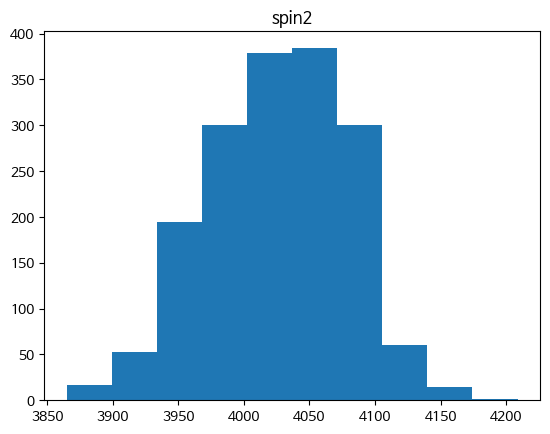

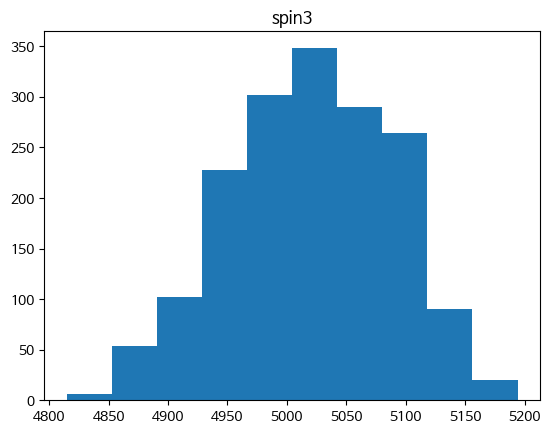

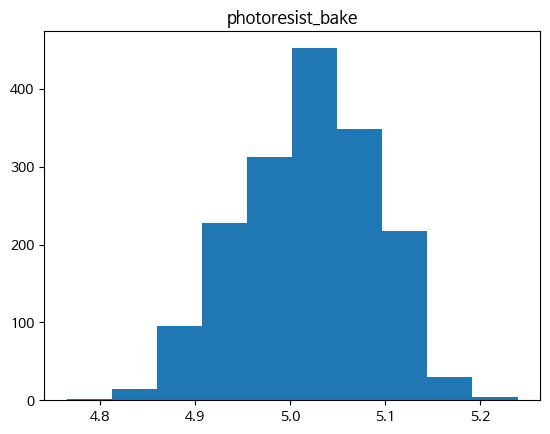

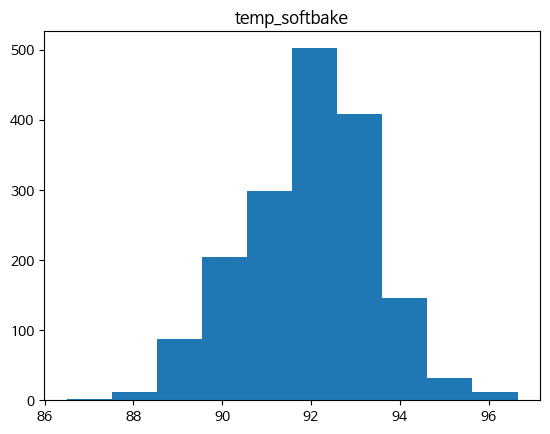

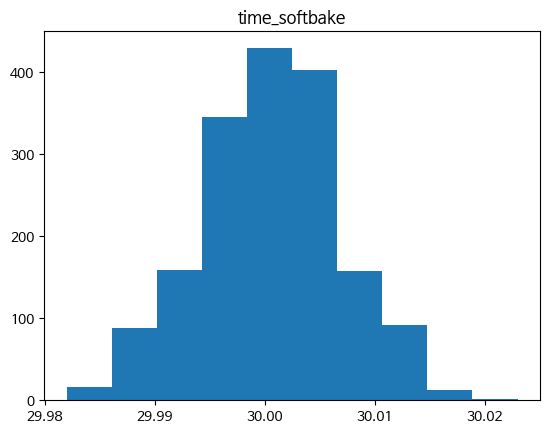

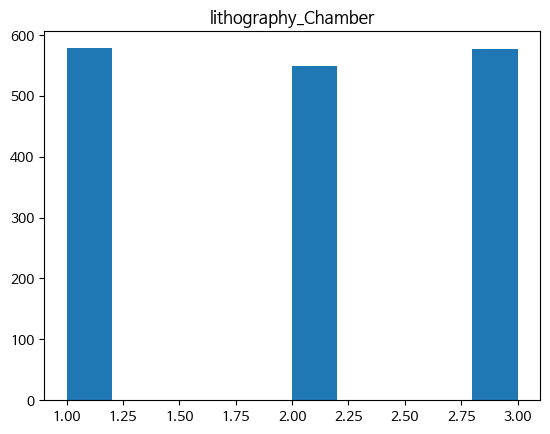

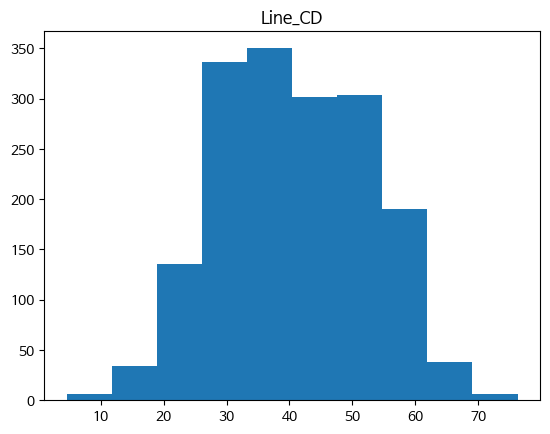

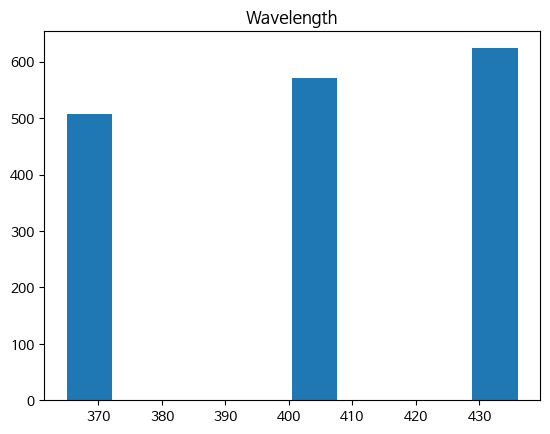

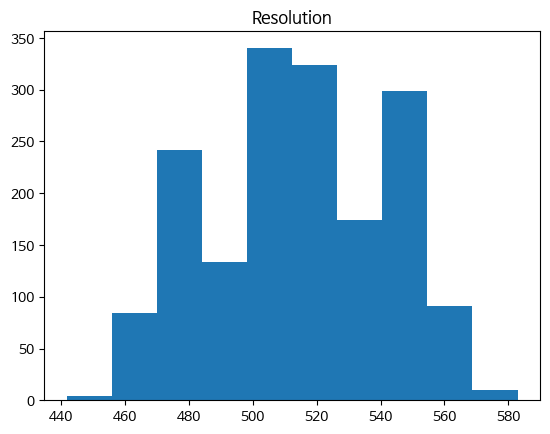

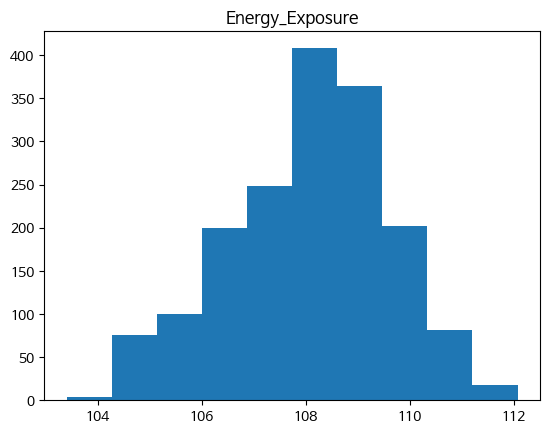

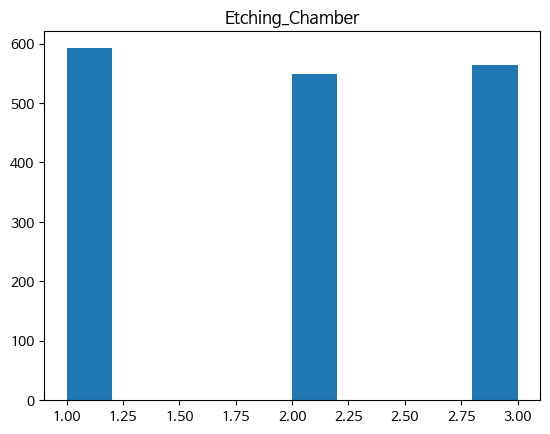

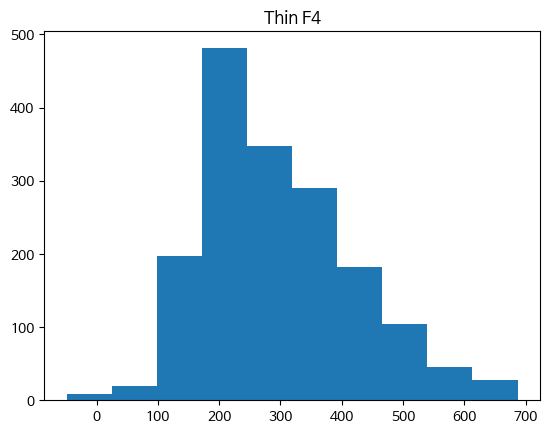

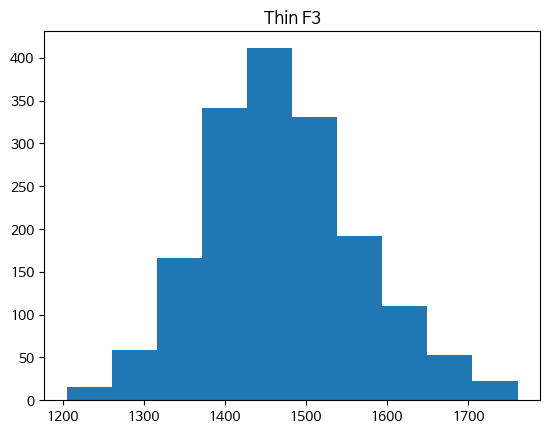

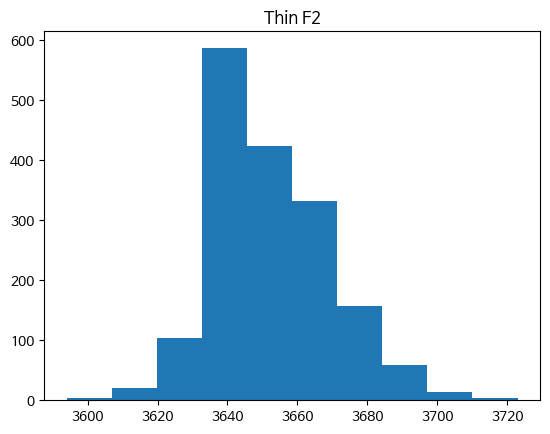

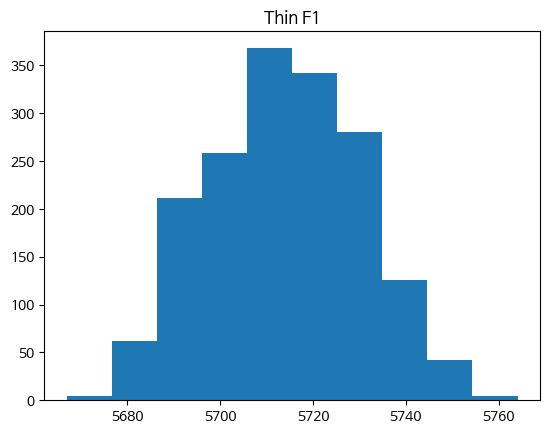

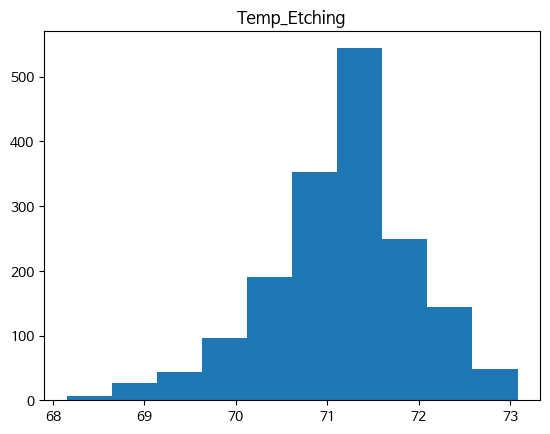

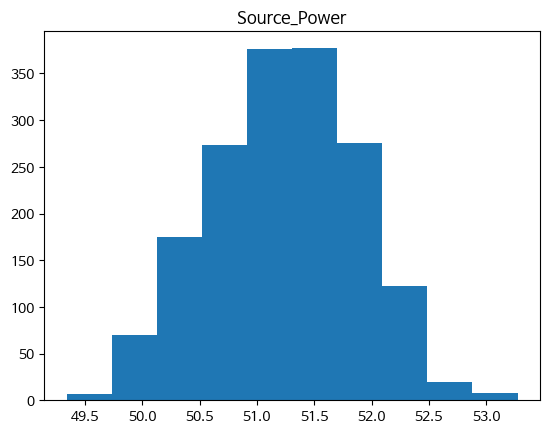

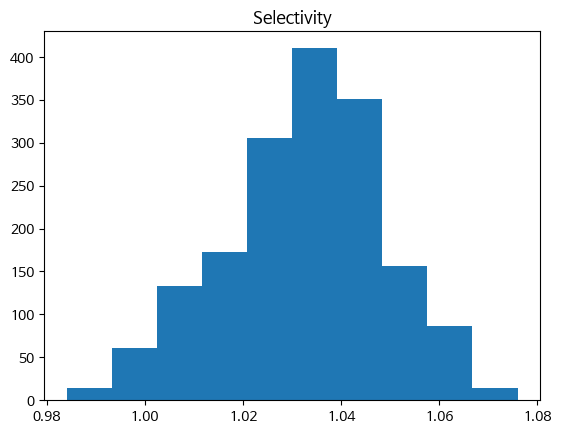

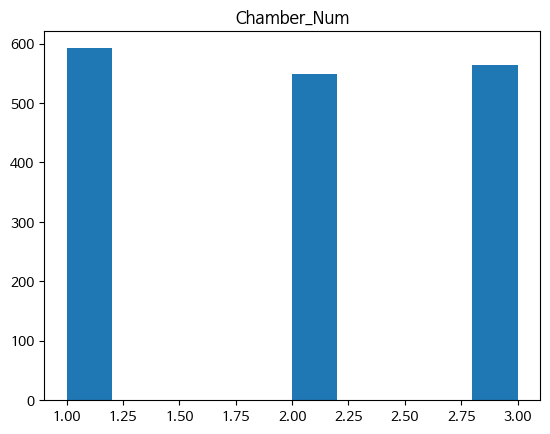

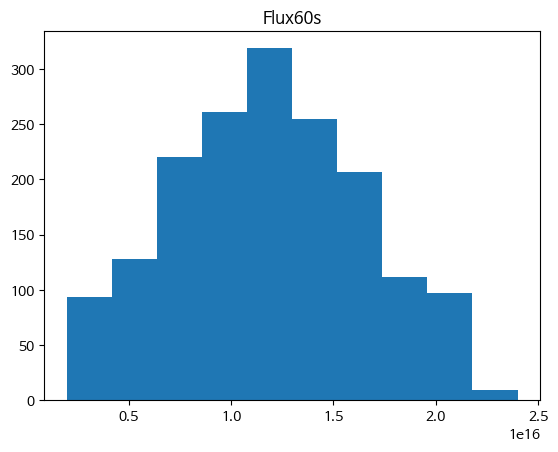

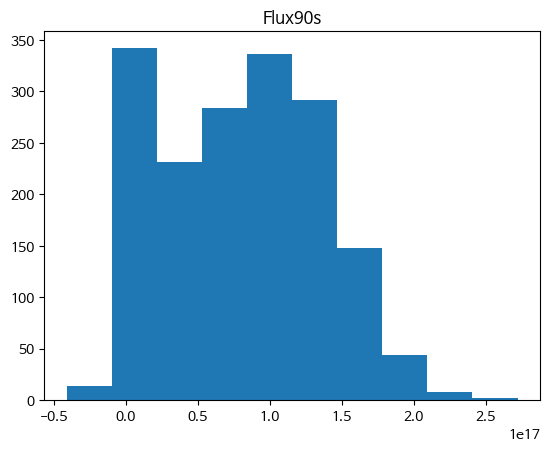

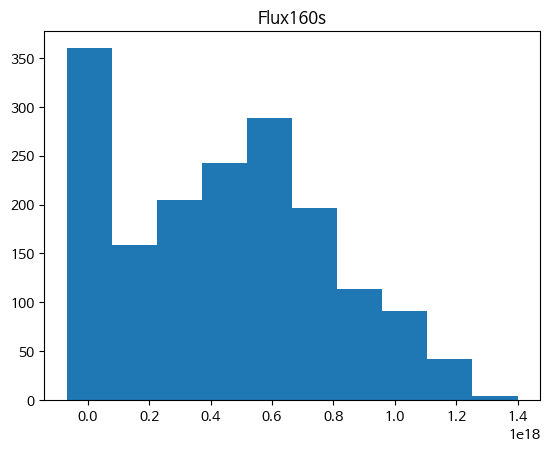

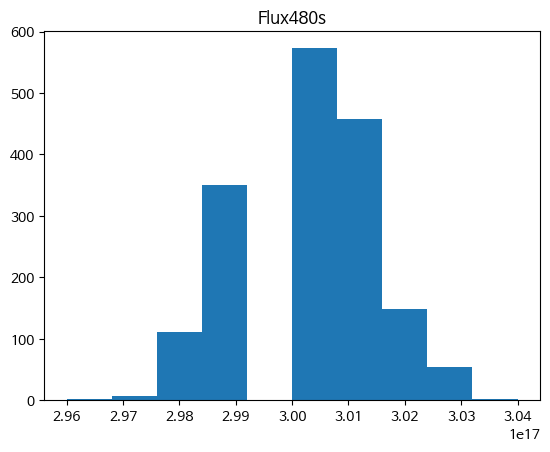

IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 11

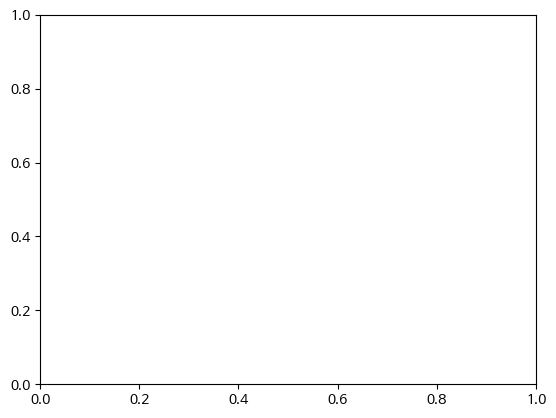

In [12]:
#데이터 속성 확인하기
columns = df.select_dtypes(include=['float64', 'int64']).columns
for c in columns:
    plt.hist(df[c])
    plt.title(c)
    plt.show()